# Pneumonia Detection from Chest X-Rays: Exploratory Data Analysis

### Content:
- [Part 1: Demographic Distribution](#Part-1:-Demographic-Distribution)
    - [1.1 Distribution of Gender](#1.1-Distribution-of-Gender)
    - [1.2 Distribution of Age](#1.2-Distribution-of-Age)
- [Part 2: Disease Distribution and Comorbidity](#Part-2:-Disease-Distribution-and-Comorbidity)     
    - [2.1 Diseases Distribution](#2.1-Diseases-Distribution)
    - [2.2 Number of Diseases per Patient](#2.2-Number-of-Diseases-per-Patient)
    - [2.3 Comorbidity](#2.3-Comorbidity)   
    
- [Part 3: Pixel-level assessments](#Part-3:-Pixel-Level-Assessments)


In [1]:
import os
import glob

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from itertools import chain
from skimage.io import imread, imshow

## Part 0: Data Loading

In [2]:
# load the whole NIH dataset
all_xray_df = pd.read_csv('../data/Data_Entry_2017.csv')
all_xray_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
102996,00027457_000.png,Infiltration,0,27457,54,M,PA,2544,3056,0.139,0.139
34024,00008908_004.png,Infiltration,4,8908,69,F,PA,2992,2991,0.143,0.143
65149,00016083_002.png,Consolidation,2,16083,62,M,PA,3056,2544,0.139,0.139


In [3]:
print('The size of the whole dataset: ', all_xray_df.shape)

The size of the whole dataset:  (112120, 11)


In [4]:
# Find all unique labels
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
print('All labels ({}): {}'.format(len(all_labels), all_labels))

# Encoding
for label in all_labels:
    all_xray_df[label] = all_xray_df['Finding Labels'].map(lambda finding: 1 if label in finding else 0)
    
all_xray_df.sample(3)

All labels (15): ['Atelectasis' 'Cardiomegaly' 'Consolidation' 'Edema' 'Effusion'
 'Emphysema' 'Fibrosis' 'Hernia' 'Infiltration' 'Mass' 'No Finding'
 'Nodule' 'Pleural_Thickening' 'Pneumonia' 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
39051,00010222_016.png,Edema,16,10222,48,M,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
94442,00024212_000.png,No Finding,0,24212,60,M,PA,2992,2991,0.143,...,0,0,0,0,0,1,0,0,0,0
19210,00005089_026.png,No Finding,26,5089,37,F,AP,2500,2048,0.168,...,0,0,0,0,0,1,0,0,0,0


## Part 1: Demographic Distribution

[Go back to top](#Content:)

### 1.1 Distribution of Gender

Text(0.5, 0, 'Gender')

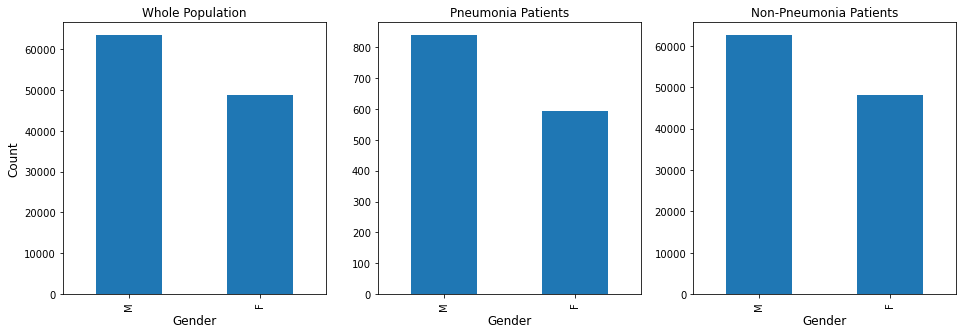

In [5]:
plt.figure(figsize=(16, 5))

plt.subplot(131)
all_xray_df["Patient Gender"].value_counts().plot(kind='bar')
plt.title('Whole Population', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(132)
all_xray_df[all_xray_df.Pneumonia==1]['Patient Gender'].value_counts().plot(kind='bar')
plt.title('Pneumonia Patients', fontsize=12)
plt.xlabel('Gender', fontsize=12)

plt.subplot(133)
all_xray_df[all_xray_df.Pneumonia==0]['Patient Gender'].value_counts().plot(kind='bar')
plt.title('Non-Pneumonia Patients', fontsize=12)
plt.xlabel('Gender', fontsize=12)

### 1.2 Distribution of Age

Text(0.5, 0, 'Age')

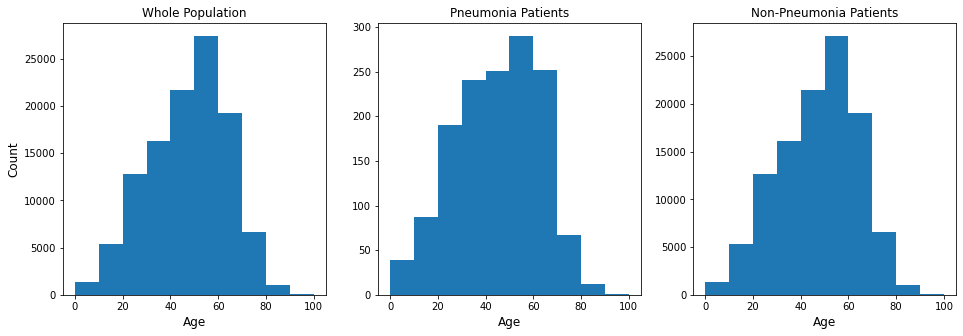

In [6]:
plt.figure(figsize=(16, 5))

plt.subplot(131)
plt.hist(all_xray_df['Patient Age'], range=[0, 100])
plt.title('Whole Population', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(132)
plt.hist(all_xray_df[all_xray_df.Pneumonia==1]['Patient Age'], range=[0, 100])
plt.title('Pneumonia Patients')
plt.xlabel('Age', fontsize=12)

plt.subplot(133)
plt.hist(all_xray_df[all_xray_df.Pneumonia==0]['Patient Age'], range=[0, 100])
plt.title('Non-Pneumonia Patients')
plt.xlabel('Age', fontsize=12)

## Part 2: Disease Distribution and Comorbidity

[Go back to top](#Content:)

### 2.1 Diseases Distribution

Text(0, 0.5, 'Count')

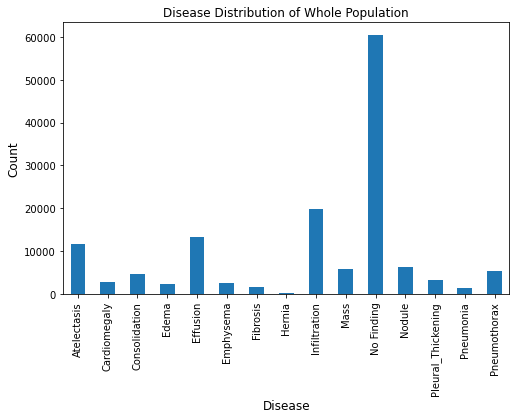

In [7]:
plt.figure(figsize=(8, 5))
all_xray_df[all_labels].sum().plot(kind='bar')
plt.title('Disease Distribution of Whole Population', fontsize=12)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [8]:
no_finding_p = all_xray_df['No Finding'].sum() / len(all_xray_df)
print('The percentage of patients with no findings: {:.2f}%\n'.format(no_finding_p*100))

pneu_num = all_xray_df['Pneumonia'].sum()
pneu_p = pneu_num / len(all_xray_df)
print('The number of Pneumonia cases = {} which takes {:.2f}% of the whole population.\n'.format(pneu_num, pneu_p*100))

non_pneu_num = len(all_xray_df)-pneu_num
non_pneu_p = 1 - pneu_p
print('The number of Pneumonia cases = {} which takes {:.2f}% of the whole population.\n'.format(non_pneu_num, non_pneu_p*100))

The percentage of patients with no findings: 53.84%

The number of Pneumonia cases = 1431 which takes 1.28% of the whole population.

The number of Pneumonia cases = 110689 which takes 98.72% of the whole population.



### 2.2 Number of Diseases per Patient

In [9]:
all_xray_df['Disease Count'] = all_xray_df[all_labels].sum(axis=1)
all_xray_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing_x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Disease Count
57335,00014223_018.png,Effusion,18,14223,28,M,AP,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,1
53524,00013520_018.png,No Finding,18,13520,18,M,AP,3056,2544,0.139,...,0,0,0,0,1,0,0,0,0,1
37809,00009944_000.png,No Finding,0,9944,45,F,PA,2048,2500,0.168,...,0,0,0,0,1,0,0,0,0,1


In [10]:
# Average number of diseases per patient
average_count = all_xray_df['Disease Count'].sum() / len(all_xray_df)
print('The average number of diseases per patient: {:.2f}'.format(average_count))

The average number of diseases per patient: 1.26


Text(0, 0.5, 'Patient Count')

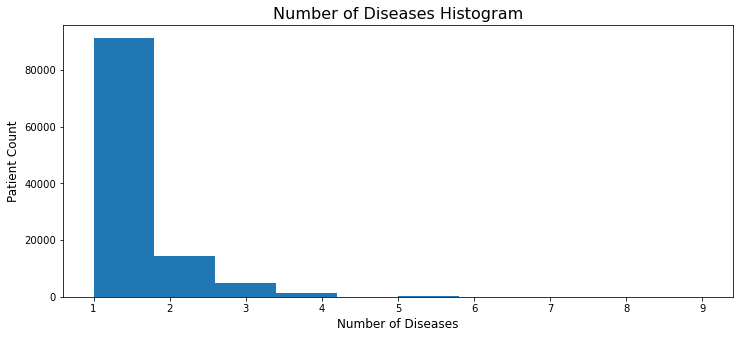

In [11]:
plt.figure(figsize=(12, 5))
plt.hist(all_xray_df['Disease Count'])
plt.title('Number of Diseases Histogram', fontsize=16)
plt.xlabel('Number of Diseases', fontsize=12)
plt.ylabel('Patient Count', fontsize=12)

### 2.3 Comorbidity    

Text(0, 0.5, 'Count')

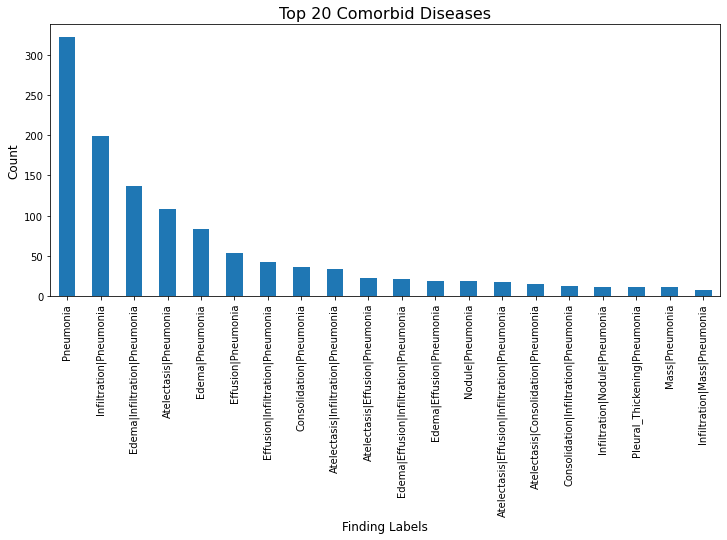

In [12]:
# Top 20 most common co-occurrences with Pneumonia
plt.figure(figsize=(12, 5))
all_xray_df[all_xray_df.Pneumonia==1]['Finding Labels'].value_counts()[0:20].plot(kind='bar')
plt.title('Top 20 Comorbid Diseases', fontsize=16)
plt.xlabel('Finding Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

# The top three most common comorbidities are Infiltration, Edema and Atelectasis.

## Part 3: Pixel Level Assessments    
[Go back to top](#Content:)

In [13]:
# A sample dataset was used for pixel level assessments
sample_temp_df = pd.read_csv('../data/sample_labels.csv')
sample_indexes = list(sample_temp_df['Image Index'])

In [14]:
sample_df = all_xray_df[all_xray_df['Image Index'].isin(sample_indexes)]
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing_x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Disease Count
58403,00014438_005.png,Nodule,5,14438,54,F,PA,2892,2948,0.143,...,0,0,0,0,0,1,0,0,0,1
26442,00006944_002.png,Atelectasis|Edema,2,6944,66,M,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,2
21938,00005807_001.png,No Finding,1,5807,35,F,PA,2992,2991,0.143,...,0,0,0,0,1,0,0,0,0,1


In [15]:
# get paths for all images, output is a dic
all_image_paths = {os.path.basename(x): x for x in glob.glob(os.path.join('../data', 'images*', '*', '*.png'))}

In [16]:
# randomly choose three images for No Finding, Pneumonia, Infiltration, Edema, Atelectasis
noFinding_idxes = sample_df[sample_df['No Finding']==1].sample(3)['Image Index']
pneumonia_idxes = sample_df[(sample_df['Pneumonia']==1)&(sample_df['Disease Count']==1)].sample(3)['Image Index']
edema_idxes = sample_df[(sample_df['Edema']==1)&(sample_df['Disease Count']==1)].sample(3)['Image Index']
infiltration_idxes = sample_df[(sample_df['Infiltration']==1)&(sample_df['Disease Count']==1)].sample(3)['Image Index']
atelectasis_idxes = sample_df[(sample_df['Atelectasis']==1)&(sample_df['Disease Count']==1)].sample(3)['Image Index']

# get pixels values
noFinding_pixels = [imread(all_image_paths[img]) for img in noFinding_idxes]
pneumonia_pixels = [imread(all_image_paths[img]) for img in pneumonia_idxes]
edema_pixels = [imread(all_image_paths[img]) for img in edema_idxes]
infiltration_pixels = [imread(all_image_paths[img]) for img in infiltration_idxes]
atelectasis_pixels = [imread(all_image_paths[img]) for img in atelectasis_idxes]

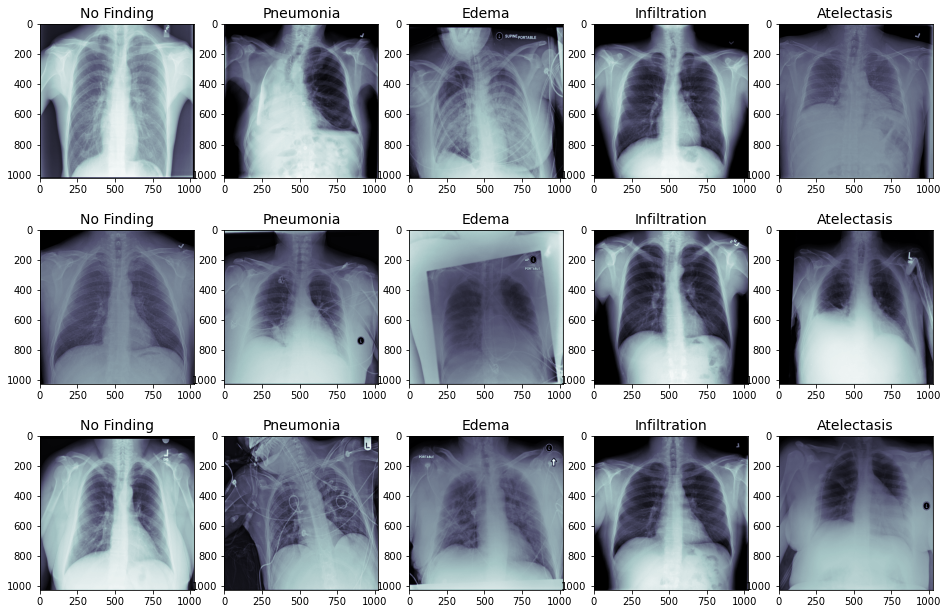

In [17]:
plt.figure(figsize=(16, 12))

p = 1
for i in range(3):
    plt.subplot(3,5,p)
    plt.imshow(noFinding_pixels[i], cmap='bone')
    plt.title('No Finding', fontsize=14)
    plt.subplots_adjust(top=0.8)
    p += 5

p = 2
for i in range(3):
    plt.subplot(3,5,p)
    plt.imshow(pneumonia_pixels[i], cmap='bone')
    plt.title('Pneumonia', fontsize=14)
    plt.subplots_adjust(top=0.8)
    p += 5
    
p = 3
for i in range(3):
    plt.subplot(3,5,p)
    plt.imshow(edema_pixels[i], cmap='bone')
    plt.title('Edema', fontsize=14)
    plt.subplots_adjust(top=0.8)
    p += 5
    
p = 4
for i in range(3):
    plt.subplot(3,5,p)
    plt.imshow(infiltration_pixels[i], cmap='bone')
    plt.title('Infiltration', fontsize=14)
    plt.subplots_adjust(top=0.8)
    p += 5
    
p = 5
for i in range(3):
    plt.subplot(3,5,p)
    plt.imshow(atelectasis_pixels[i], cmap='bone')
    plt.title('Atelectasis', fontsize=14)
    plt.subplots_adjust(top=0.8)
    p += 5

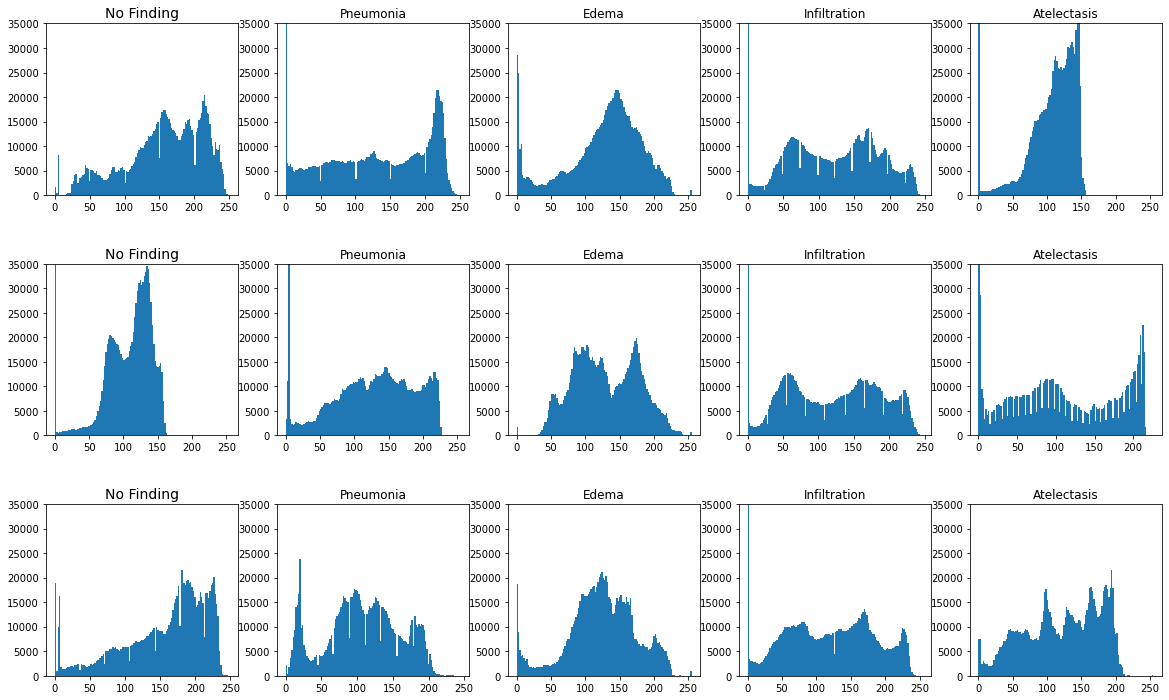

In [18]:
plt.figure(figsize=(20, 12))

p = 1
for i in range(3):
    ax = plt.subplot(3,5,p)
    ax.set_ylim([0, 35000])
    plt.hist(noFinding_pixels[i].flatten(), bins=128)
    plt.title('No Finding', fontsize=14)
    plt.subplots_adjust(hspace=0.4)
    p += 5
    
p = 2
for i in range(3):
    ax = plt.subplot(3,5,p)
    ax.set_ylim([0, 35000])
    plt.hist(pneumonia_pixels[i].flatten(), bins=128)
    plt.title('Pneumonia', fontsize=12)
    plt.subplots_adjust(hspace=0.4)
    p += 5
    
p = 3
for i in range(3):
    ax = plt.subplot(3,5,p)
    ax.set_ylim([0, 35000])
    plt.hist(edema_pixels[i].flatten(), bins=128)
    plt.title('Edema', fontsize=12)
    plt.subplots_adjust(hspace=0.4)
    p += 5
    
p = 4
for i in range(3):
    ax = plt.subplot(3,5,p)
    ax.set_ylim([0, 35000])
    plt.hist(infiltration_pixels[i].flatten(), bins=128)
    plt.title('Infiltration', fontsize=12)
    plt.subplots_adjust(hspace=0.4)
    p += 5
    
p = 5
for i in range(3):
    ax = plt.subplot(3,5,p)
    ax.set_ylim([0, 35000])
    plt.hist(atelectasis_pixels[i].flatten(), bins=128)
    plt.title('Atelectasis', fontsize=12)
    plt.subplots_adjust(hspace=0.4)
    p += 5